# Analisando Plano de Alocações

Notebook com análises preliminares do arquivo de output com as alocações definidas pelo modelo.

<b><font font-size=87.5% color=#e83e8c word-break=break-word>Importante:</font></b> antes de rodar este notebook é necessário
que você já tenha executado o modelo de alocações ao menos uma vez antes. Caso contrário um erro de arquivo não encontrado ocorrerá
durante a etapa de leitura dos outputs (passo 3).

## Bibliotecas Adicionais

Para rodar este notebook, é necessário que você tenha a biblioteca
<a href=https://plotly.com/python/><code><font font-size=87.5% color=#e83e8c word-break=break-word>plotly</font></code></a> instalada.

<b>Para instalar o <a href=https://plotly.com/python/><code><font font-size=87.5% color=#e83e8c word-break=break-word>plotly</font></code></a> descomente o código da célula abaixo.</b>

In [ ]:
# pip install plotly

## Imports Necessários

In [27]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

from allocpro import config as cfg

### Definindo Parâmetros do Notebook

In [68]:
pd.set_option("display.max_columns", None)

colors = [
    "#03045E",
    "#023E8A",
    "#0077B6",
    "#0096C7",
    "#00B4D8",
    "#48CAE4",
    "#90E0EF",
    "#ADE8F4",
    "#CAF0F8",
    "#CFF1F9",
    "#EDFAFD",
]

## Realizando Leitura da Tabela de Output com as Definições de Alocações por Empresa

In [4]:
df = pd.read_excel(cfg.RESULTADO_FILEPATH)
df

,empresa,prioridade,grupo,possui trimestral,deadline,horas,senior,staff 3,staff 2,trainee,fase_planejamento,fase_interim,fase_final,fase_trimestral,2023-07-15,2023-07-22,2023-07-29,2023-08-05,2023-08-12,2023-08-19,2023-08-26,2023-09-02,2023-09-09,2023-09-16,2023-09-23,2023-09-30,2023-10-07,2023-10-14,2023-10-21,2023-10-28,2023-11-04,2023-11-11,2023-11-18,2023-11-25,2023-12-02,2023-12-09,2023-12-16,2023-12-23,2023-12-30,2024-01-06,2024-01-13,2024-01-20,2024-01-27,2024-02-03,2024-02-10,2024-02-17,2024-02-24,2024-03-02,2024-03-09,2024-03-16,2024-03-23,2024-03-30,2024-04-06,2024-04-13,2024-04-20,2024-04-27,2024-05-04,2024-05-11,2024-05-18,2024-05-25,2024-06-01,2024-06-08,2024-06-15,2024-06-22,2024-06-29
0,SUL AMERICA,1,1,Yes,Fev / Mar,18201,4,0,3,2,13,15,16,4,40,40,40,40,0,0,0,0,0,0,0,0,0,40,40,40,40,40,40,40,40,40,40,0,0,40,40,40,40,40,40,40,40,40,40,40,40,0,40,40,40,40,40,40,40,40,40,40,0,0,40
1,REDE DOR,2,1,Yes,Fev / Mar,18850,4,0,3,2,13,15,16,4,0,40,40,40,40,0,0,0,0,0,0,0,0,40,40,40,40,40,40,40,40,40,40,0,0,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,0,0,40
2,TIM,3,1,Yes,Fev,16400,3,0,3,2,13,15,16,4,40,40,40,40,0,0,0,0,0,0,0,0,0,40,40,40,40,40,40,40,40,40,40,0,0,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,0,0,40
3,GLOBO - GLOBO,4,1,Yes,Mar,11550,2,0,3,2,13,15,16,4,0,40,40,40,40,0,0,0,0,0,0,0,0,40,40,40,40,40,40,40,40,40,40,0,0,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,0,0,40
4,BROOKFIELD ENERGY (ELERA),5,1,Yes,Fev / Mar,12000,2,0,3,2,13,15,16,4,40,40,40,40,0,0,0,0,0,0,0,0,0,40,40,40,40,40,40,40,40,40,40,0,0,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,CALEFFI BRASIL AUP,154,11,No,Fev,200,0,1,1,1,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,40,40,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
154,Planeta / DeAgostini,155,11,No,Mar,200,0,1,1,1,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,40,40,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
155,TI LATAM AUP,156,11,No,Abr,200,0,1,1,1,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,40,40,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
156,ALLSEAS,157,11,No,Jun,160,0,1,1,1,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,40,40,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Criando lista com os nomes das colunas com as semanas das alocações

In [67]:
date_cols = []
for col in df.columns:
    date_col = pd.to_datetime(col, errors="coerce")
    if pd.notnull(date_col):
        date_cols.append(col)


## Análises dos Resultados

### Quantidade total de horas alocadas em cada semana

O gráfico a seguir apresenta a quantidade total de horas na semana demandadas por todas as alocações feitas pelo modelo.

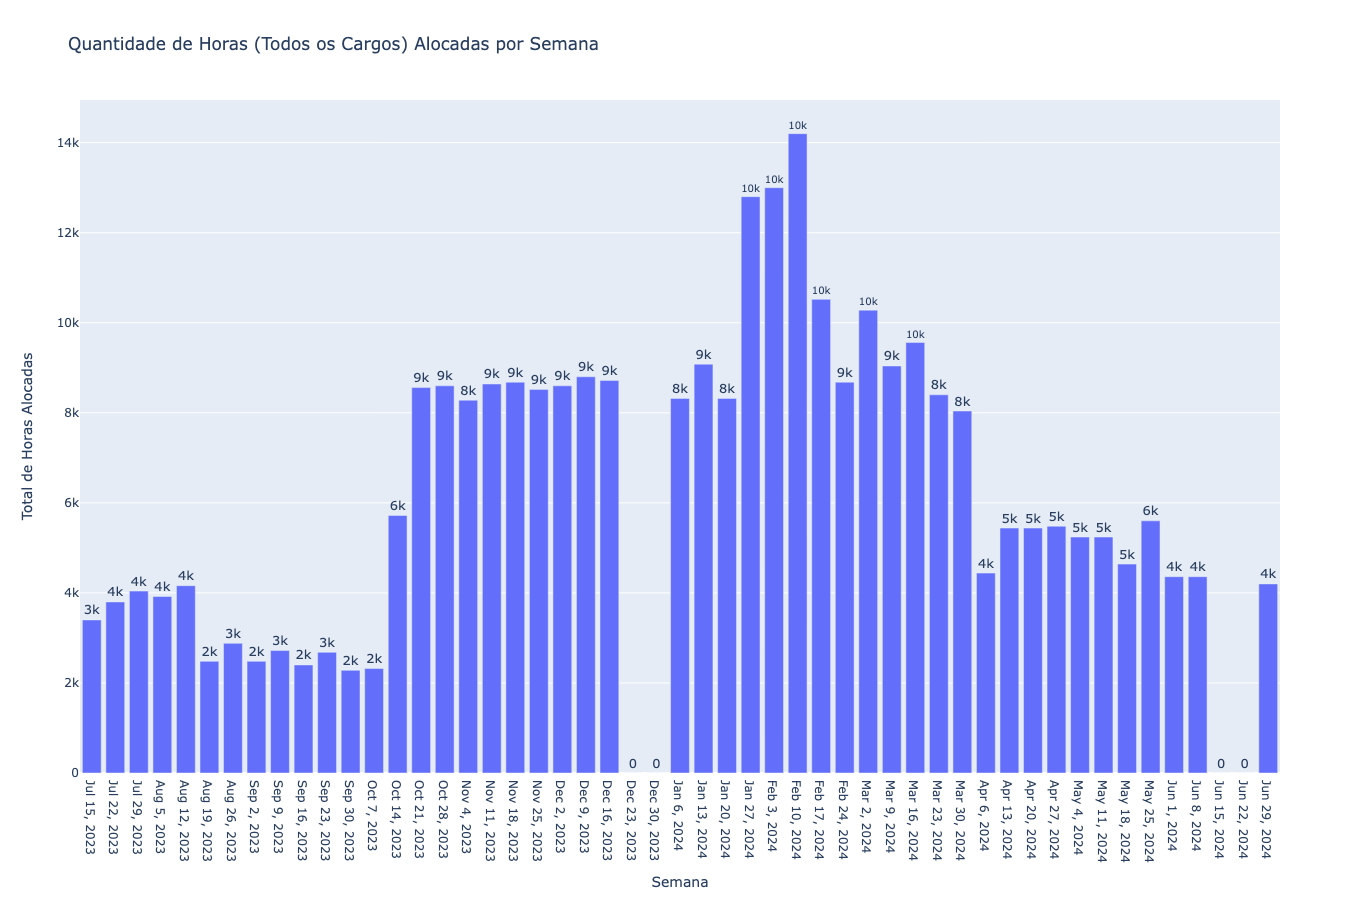

In [92]:
rank_cols = ["senior", "staff 3", "staff 2", "trainee"]

total_employees_allocated = df[rank_cols].sum(axis=1)

weekly_hours_allocated = df[date_cols].apply(lambda col: (col * total_employees_allocated).sum()).to_frame("Total de Horas Alocadas")
weekly_hours_allocated.index = pd.to_datetime(weekly_hours_allocated.index)
weekly_hours_allocated.index.name = "Semana"
weekly_hours_allocated = weekly_hours_allocated.reset_index()

fig = px.bar(weekly_hours_allocated, x='Semana', y='Total de Horas Alocadas',
             title="Quantidade de Horas (Todos os Cargos) Alocadas por Semana",
             height=900, text_auto='.1s')

fig.update_traces(textfont_size=13, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=weekly_hours_allocated['Semana'],
    )
)

fig.show()

### Quantidade total de pessoas (todos os cargos) alocadas em cada semana

O gráfico abaixo apresenta a quantidade total de pessoas (somando todos os cargos) na semana demandadas
pelas alocações que o modelo gerou.

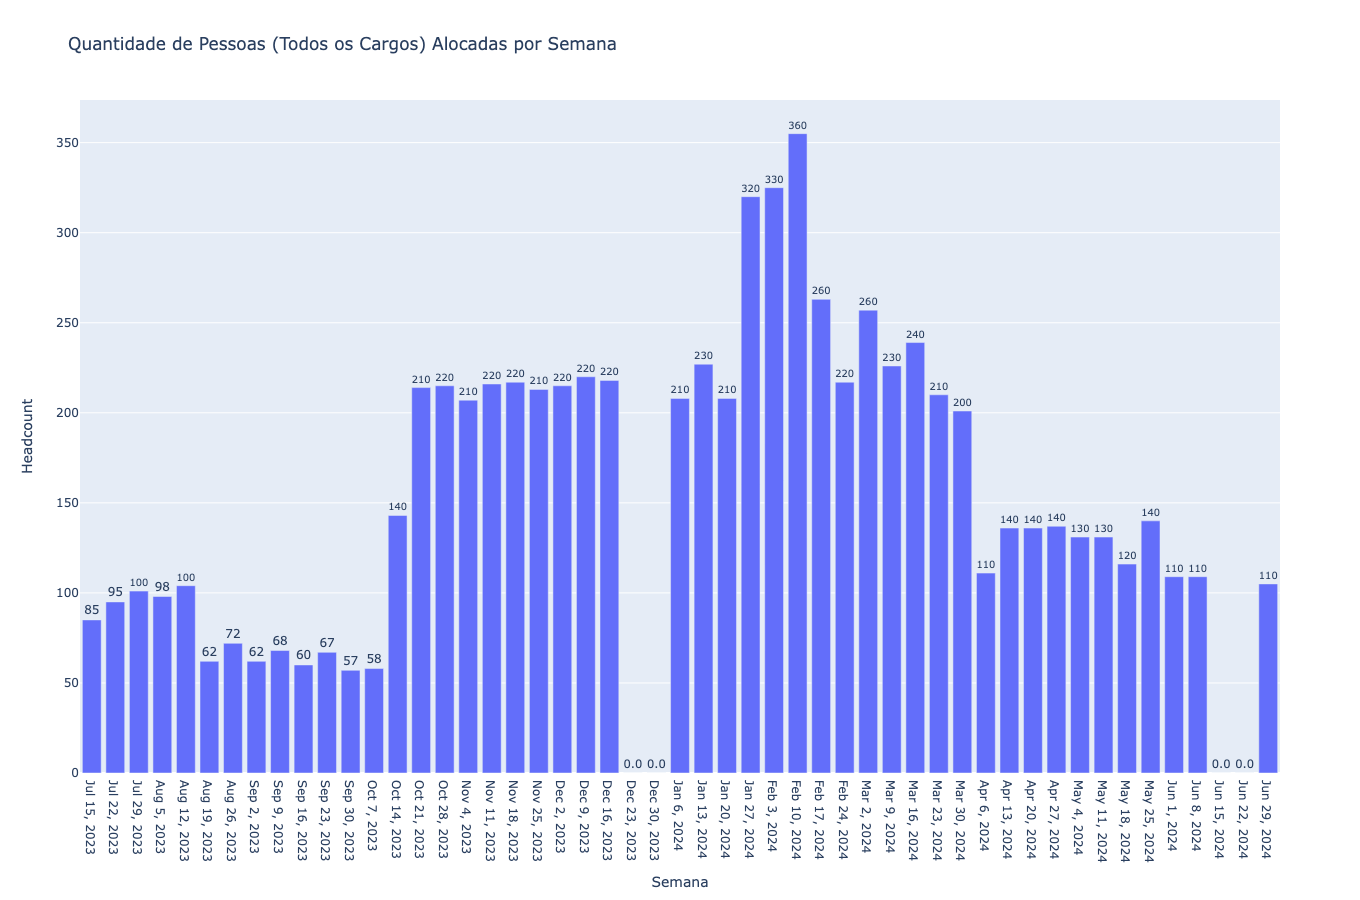

In [78]:
total_employees_necessary = weekly_hours_allocated[["Semana"]]
total_employees_necessary['Headcount'] = (weekly_hours_allocated['Total de Horas Alocadas'] / 40).astype(int)
fig = px.bar(total_employees_necessary, x='Semana', y='Headcount', text_auto='.2s',
             title="Quantidade de Pessoas (Todos os Cargos) Alocadas por Semana", height=900)

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=total_employees_necessary['Semana'],
    )
)

fig.show()

### Quantidade total de pessoas por cargo alocadas em cada semana

O gráfico abaixo apresenta a quantidade total de pessoas por cargo alocadas em cada semana.

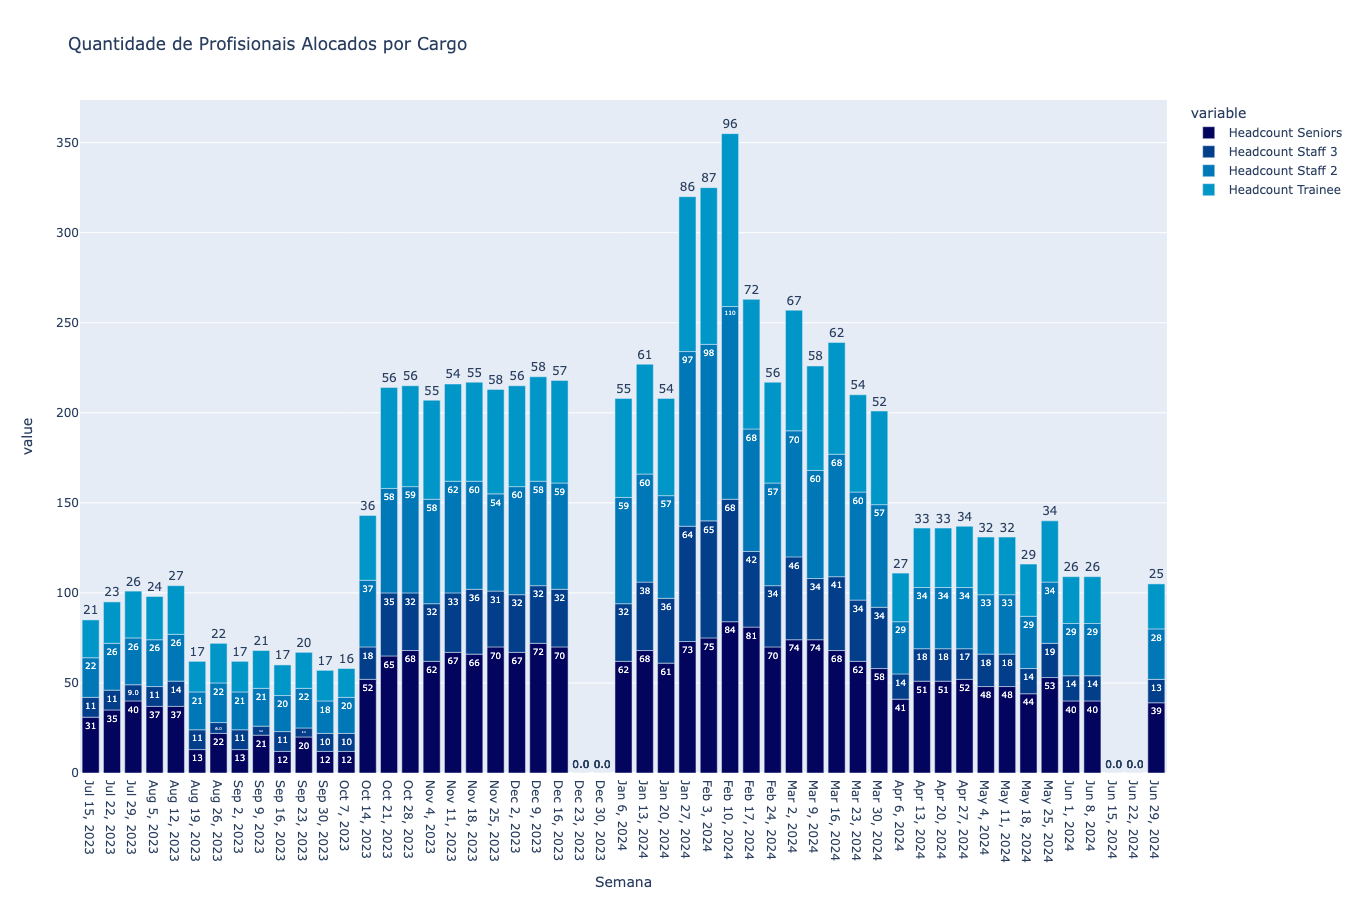

In [80]:
weekly_senior_allocated = df[date_cols].apply(lambda col: np.where(col > 0, df["senior"], 0).sum()).to_frame("Headcount Seniors")
weekly_staff3_allocated = df[date_cols].apply(lambda col: np.where(col > 0, df["staff 3"], 0).sum()).to_frame("Headcount Staff 3")
weekly_staff2_allocated = df[date_cols].apply(lambda col: np.where(col > 0, df["staff 2"], 0).sum()).to_frame("Headcount Staff 2")
weekly_trainee_allocated = df[date_cols].apply(lambda col: np.where(col > 0, df["trainee"], 0).sum()).to_frame("Headcount Trainee")

weekly_allocations_by_rank = (
    weekly_senior_allocated.merge(weekly_staff3_allocated, left_index=True, right_index=True, how="inner")
    .merge(weekly_staff2_allocated, left_index=True, right_index=True, how="inner")
    .merge(weekly_trainee_allocated, left_index=True, right_index=True, how="inner")
)

weekly_allocations_by_rank.index = pd.to_datetime(weekly_allocations_by_rank.index)
weekly_allocations_by_rank.index.name = "Semana"
weekly_allocations_by_rank = weekly_allocations_by_rank.reset_index()

fig = px.bar(
    weekly_allocations_by_rank,
    x="Semana",
    y=["Headcount Seniors", "Headcount Staff 3", "Headcount Staff 2", "Headcount Trainee"],
    title="Quantidade de Profisionais Alocados por Cargo",
    height=900,
    color_discrete_sequence=colors,
    text_auto='.2s',
)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=weekly_allocations_by_rank['Semana'],
    )
)
fig.show()

### Quantidade total de pessoas (todos os cargos) alocadas por grupo de prioridade

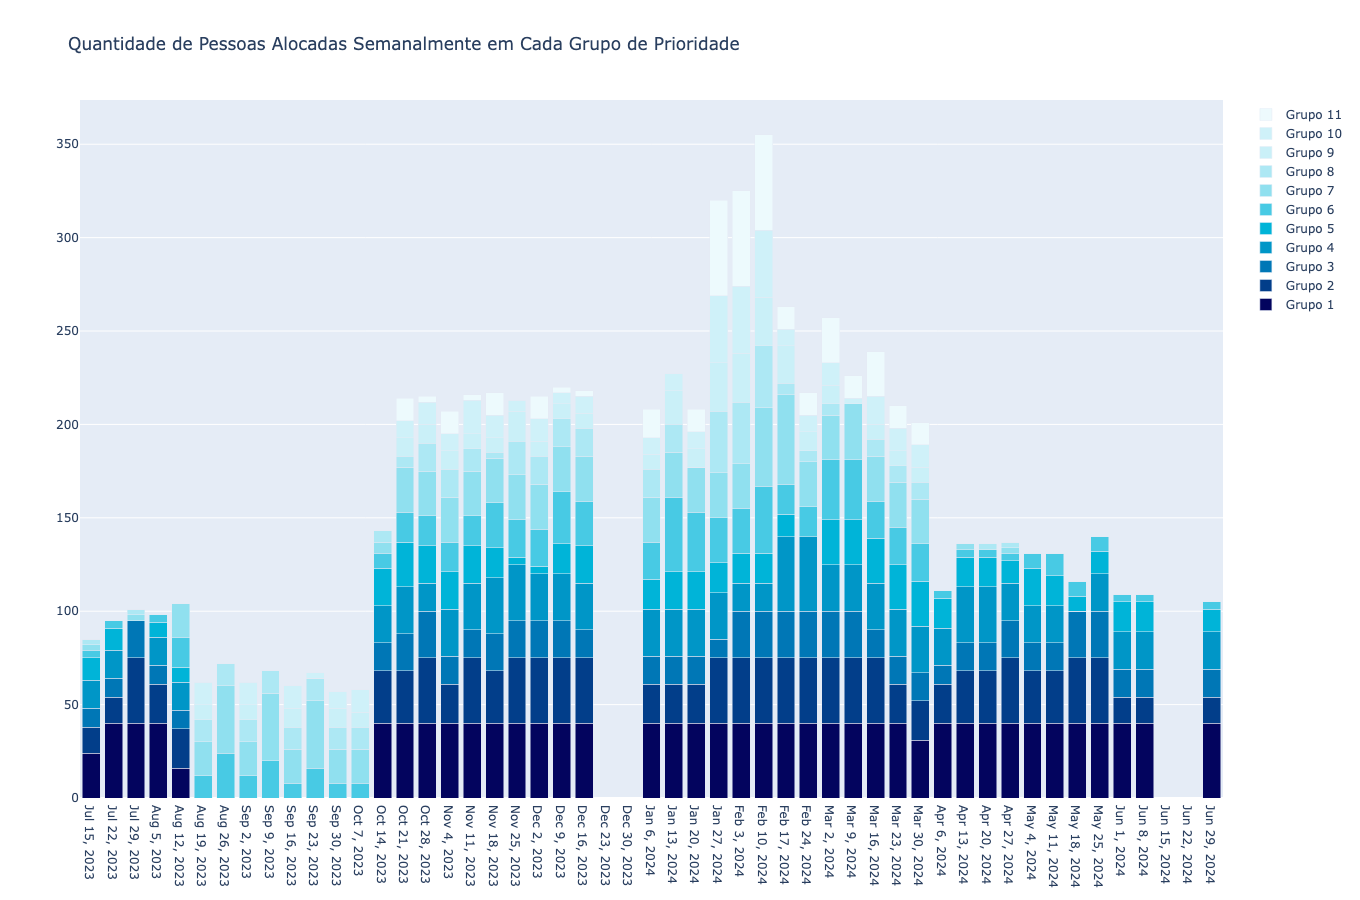

In [84]:
fig = go.Figure()

grupos = df["grupo"].sort_values().unique()
for idx, grupo in enumerate(grupos):
    df_grupo = df.loc[df["grupo"] == grupo]

    total_employees_allocated = df_grupo[rank_cols].sum(axis=1)
    
    weekly_hours_allocated = df_grupo[date_cols].apply(lambda col: (col * total_employees_allocated).sum()).to_frame("Total de Horas Alocadas")
    weekly_hours_allocated.index = pd.to_datetime(weekly_hours_allocated.index)
    weekly_hours_allocated.index.name = "Semana"
    weekly_hours_allocated = weekly_hours_allocated.reset_index()

    total_employees_necessary = weekly_hours_allocated[["Semana"]]
    total_employees_necessary['Headcount'] = (weekly_hours_allocated['Total de Horas Alocadas'] / 40).astype(int)

    fig.add_trace(
        go.Bar(
            x=total_employees_necessary["Semana"], y=total_employees_necessary["Headcount"], name=f"Grupo {grupo}", marker_color=colors[idx],
        )
    )

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(
    title="Quantidade de Pessoas Alocadas Semanalmente em Cada Grupo de Prioridade",
    xaxis=dict(
        tickmode='array',
        tickvals=total_employees_necessary['Semana'],
    )
)

fig.update_layout(barmode="stack", height=900)
fig.show()

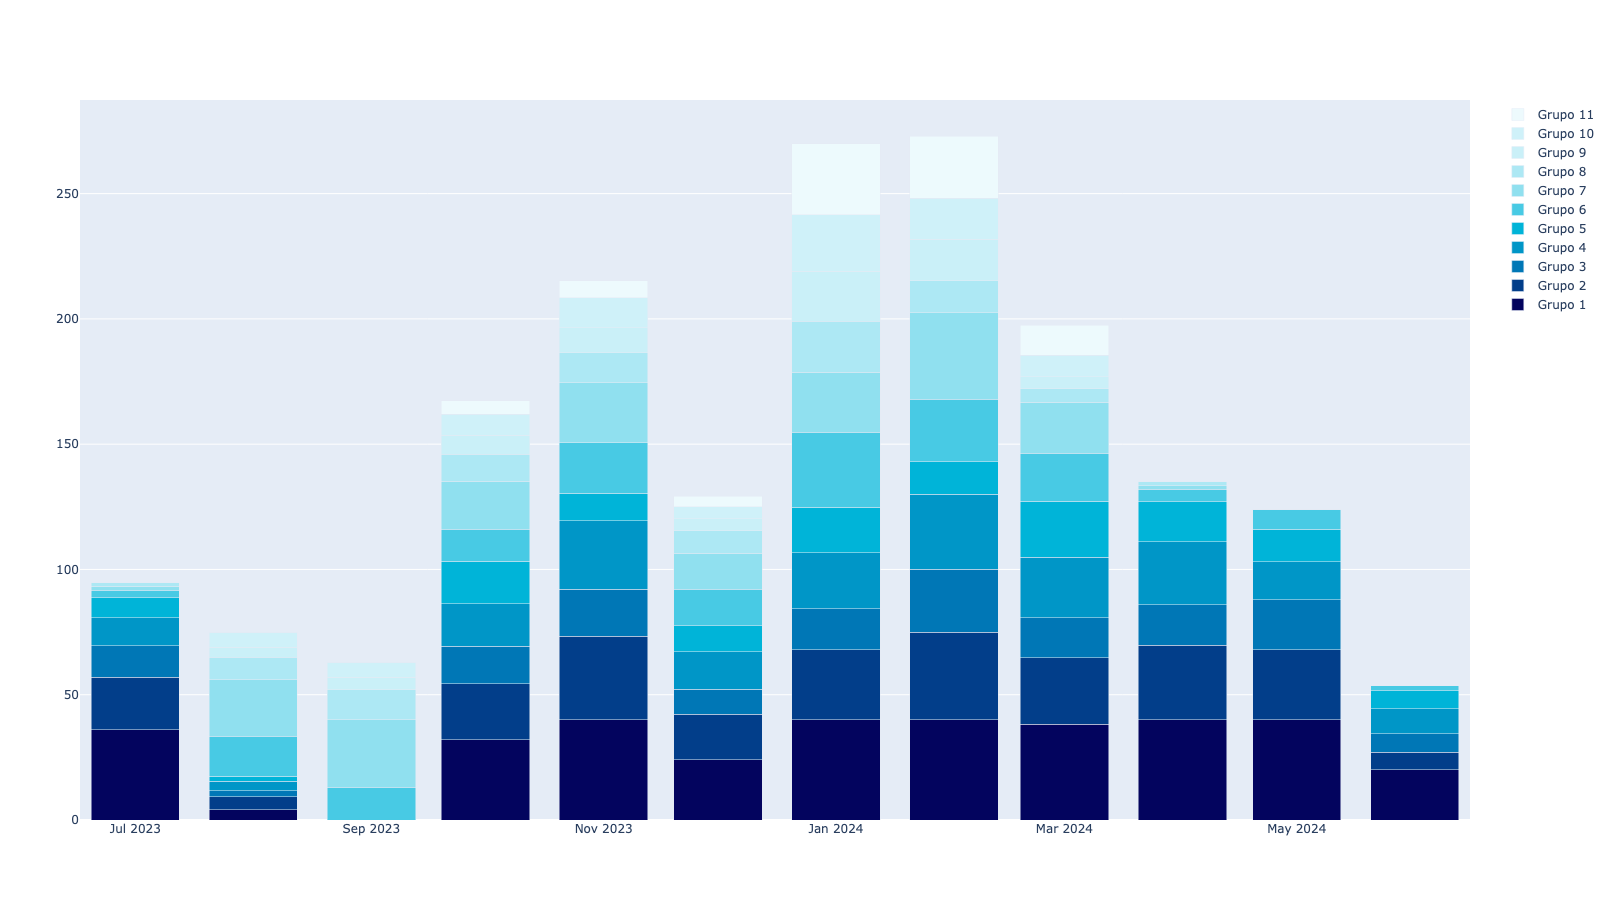

In [65]:
fig = go.Figure()

grupos = df["grupo"].sort_values().unique()
for idx, grupo in enumerate(grupos):
    df_grupo = df.loc[df["grupo"] == grupo]

    total_employees_allocated = df_grupo[rank_cols].sum(axis=1)
    
    weekly_hours_allocated = df_grupo[date_cols].apply(lambda col: (col * total_employees_allocated).sum()).to_frame("Total de Horas Alocadas")
    weekly_hours_allocated.index = pd.to_datetime(weekly_hours_allocated.index)
    weekly_hours_allocated.index.name = "Semana"
    weekly_hours_allocated = weekly_hours_allocated.reset_index()

    total_employees_necessary = weekly_hours_allocated[["Semana"]]
    total_employees_necessary['Headcount'] = (weekly_hours_allocated['Total de Horas Alocadas'] / 40).astype(int)
    total_employees_necessary = total_employees_necessary.set_index("Semana")
    total_employees_necessary.index = total_employees_necessary.index.to_period().asfreq("M", how="start").to_timestamp()
    total_employees_necessary = total_employees_necessary.reset_index()
    total_employees_necessary = total_employees_necessary.groupby("Semana", as_index=False)["Headcount"].mean().rename(columns={"Semana": "Mes"})
    total_employees_necessary["Mes"] = total_employees_necessary["Mes"]

    fig.add_trace(
        go.Bar(
            x=total_employees_necessary["Mes"], y=total_employees_necessary["Headcount"], name=f"Grupo {grupo}", marker_color=colors[idx],
        )
    )

fig.update_layout(barmode="stack", height=900)
fig.show()